### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [428]:
data = pd.read_csv('data/coupons.csv')

In [429]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [430]:
# Describing the structure of the dataframe
print('\n###########################\n Structure of dataframe')
print('###########################\n')
print(data.info())

# Get the column list with null counts
print('\n###########################\n Columns with Null count')
print('###########################\n')
data_null_cols = data.isnull().sum() 
data_null_cols = data_null_cols[data_null_cols > 0]
print(data_null_cols)

# Count of column values for each columns
print('\n###########################\n Count of column values for each columns')
print('###########################\n')
for c in data.columns:
    print(data[c].value_counts())
    print('\n---------------')



###########################
 Structure of dataframe
###########################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car 

(0.0, 12684.0)

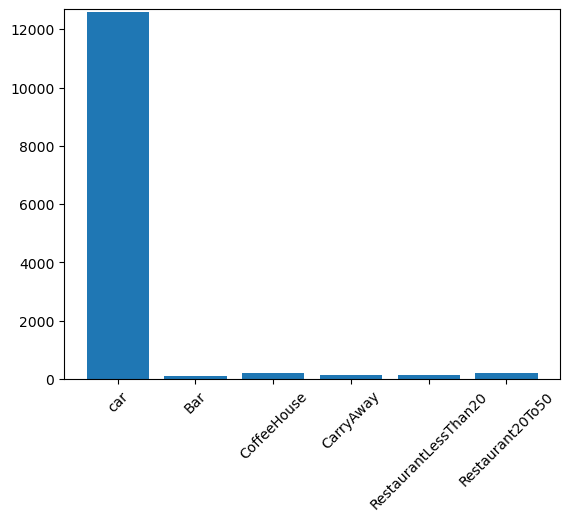

In [431]:
#Bar plot for Null column stats
plt.bar(data_null_cols.index, data_null_cols.values)
plt.xticks(rotation=45)
plt.ylim(0,len(data))

3. Decide what to do about your missing data -- drop, replace, other...

In [432]:
#Car column value is missing for most of the dataset. So replacing with default value
data['car'].fillna('value_missing', inplace=True)
print(data['car'].value_counts())

car
value_missing                               12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [433]:
#Calculating the proportion 
#perc_of_accept = (data.query('Y == 1')['Y'].sum()/len(data)) * 100
perc_of_accept = data['Y'].mean() * 100
print(f'Percentage of Coupon acceptance rate: {perc_of_accept:.2f}')

Percentage of Coupon acceptance rate: 56.84


5. Use a bar plot to visualize the `coupon` column.

Coupon counts by category: 
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


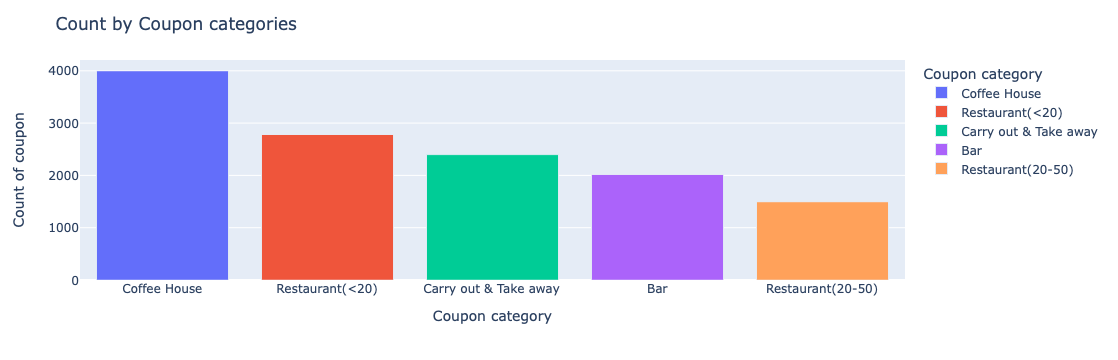

In [434]:

coupon_count = data['coupon'].value_counts()
print(f'Coupon counts by category: \n{coupon_count}')

coupon_fig = px.bar(coupon_count, x=coupon_count.index, y=coupon_count.values, color=coupon_count.index)
coupon_fig.update_layout(
    title="Count by Coupon categories",
    xaxis_title="Coupon category",
    yaxis_title="Count of coupon",
    legend_title="Coupon category")
coupon_fig.show()


6. Use a histogram to visualize the temperature column.

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Histogram plot by temperature')

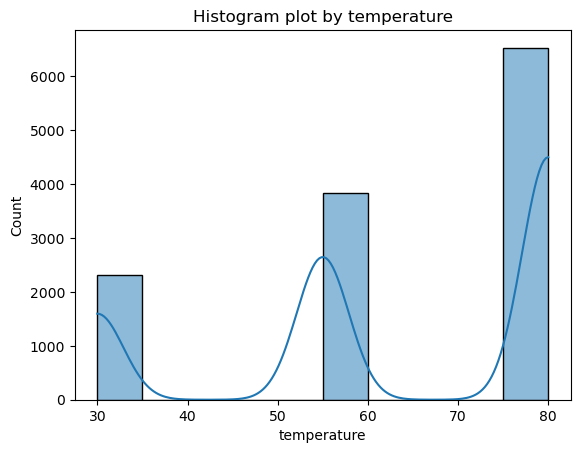

In [563]:
print(data['temperature'].value_counts())
sns.histplot(data=data, x="temperature", kde=True, bins=10)
plt.title('Histogram plot by temperature')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [137]:
data_bar = data[data['coupon'] == "Bar"]
print(f"Number of records contains only Bar coupons: {data_bar.shape[0]}")

Number of records contains only Bar coupons: 2017


2. What proportion of bar coupons were accepted?


In [436]:
bar_coupon_rate = (data_bar.query('Y == 1')['Y'].sum()/len(data_bar)) * 100
print(f'Percentage of Bar Coupon acceptance rate: {bar_coupon_rate:.2f}')

Percentage of Bar Coupon acceptance rate: 41.00


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [267]:
# Replacing the null values with 0 in Bar column
data_bar['Bar'].fillna(0, inplace=True)
print('Bar count of values')
print(data_bar['Bar'].value_counts())

#Creating new dataframe to hold only Bar visits of 3 or fewer
#data_bar_le3 = data[data["Bar"].str.contains("3", na=False) | (data["Bar"].str.contains("never", na=False)) | (data["Bar"].str.contains("less1", na=False))]
data_bar_le3 = data_bar[data_bar["Bar"].isin(["1~3","never","less1"])]

#Creating new dataframe to hold only Bar visits more than 3
data_bar_gt3 = data_bar[data_bar["Bar"].str.contains("8", na=False)]
print('*' * 50) 
print(f"Number of bar visits 3 or fewer a month: {len(data_bar_le3)}")
print(f"Number of bar visits more than 3 a month: {len(data_bar_gt3)}")

#Finding the acceptance rate of coupon acceptance based on visits dataframe
print('*' * 50) 
print(f"Bar coupon acceptance rate for bar visits 3 or fewer a month: {data_bar_le3['Y'].mean() * 100:.2F}")
print(f"Bar coupon acceptance rate for bar visits more than 3 a month: {data_bar_gt3['Y'].mean() * 100:.2F}")


Bar count of values
Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
0         21
Name: count, dtype: int64
**************************************************
Number of bar visits 3 or fewer a month: 1797
Number of bar visits more than 3 a month: 199
**************************************************
Bar coupon acceptance rate for bar visits 3 or fewer a month: 37.06
Bar coupon acceptance rate for bar visits more than 3 a month: 76.88


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [437]:
print('Count of values by Age')
print(data_bar['age'].value_counts())
bar_once_over_25 = data_bar[(data_bar["age"].isin(['below21','21']) == False) & (data_bar["Bar"].isin(["1~3","4~8","gt8"]))] 
bar_others = data_bar[(data_bar["age"].isin(['below21','21'])) & (data_bar["Bar"].isin(["1~3","4~8","gt8"]) == False)]
print(f"\nBar coupon acceptance rate for bar visits more than once a month and age over 25: {bar_once_over_25['Y'].mean() * 100:.2F}")
print(f"Bar coupon acceptance rate for fewer visits to bar and age below 26: {bar_others['Y'].mean() * 100:.2F}")


Count of values by Age
age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

Bar coupon acceptance rate for bar visits more than once a month and age over 25: 69.52
Bar coupon acceptance rate for fewer visits to bar and age below 26: 39.33


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [272]:
bar_no_kid = data_bar[(data_bar["passanger"].str.contains('Kid') == False) 
  & (data_bar["occupation"].str.contains('Farming Fishing & Forestry') == False) 
  & (data_bar["Bar"].isin(["1~3","4~8","gt8"]))] 

print(f"Bar coupon acceptance rate for bar visits more than once a month without kids and not a Farming Fishing & Forestry: {bar_no_kid['Y'].mean() * 100:.2F}")



Bar coupon acceptance rate for bar visits more than once a month without kids and not a Farming Fishing & Forestry: 71.32


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [274]:
pd.options.mode.chained_assignment = None
bar_no_widow = data_bar[(data_bar["passanger"].str.contains('Kid') == False) 
  & (data_bar["maritalStatus"].str.contains('Widowed') == False) 
  & (data_bar["Bar"].isin(["1~3","4~8","gt8"]))] 
#print(len(bar_no_widow))

bar_under_30 = data_bar[(data_bar["age"].isin(['below21','21','26']))
  & (data_bar["Bar"].isin(["1~3","4~8","gt8"]))] 
#print(len(bar_under_30))

cheap_food_more4 = data_bar[(data_bar["RestaurantLessThan20"].isin(['4~8','gt8']))]
#print(len(cheap_food_more4))

cheap_food_more4['income_max'] = cheap_food_more4['income'].str.replace(" or More","").str.replace("Less than ","").str.split(' - ').apply(lambda x: x[0] if x[-1] is None else x[-1])
cheap_food_more4['income_max'] = pd.to_numeric(cheap_food_more4['income_max'].str.replace("$",""))
#print(cheap_food_more4['income_max'].value_counts())
#print(len(cheap_food_more4))
cheap_food_income50k = cheap_food_more4.query('income_max < 50000')
#print(len(cheap_food_income50k))


print(f"Bar coupon acceptance rate for bar visits more than once a month and not a Widow: {bar_no_widow['Y'].mean() * 100:.2F}")
print(f"Bar coupon acceptance rate for bar visits more than once a month and age under 30: {bar_under_30['Y'].mean() * 100:.2F}")
print(f"Bar coupon acceptance rate for cheap restaurants visits more than 4 times and income <50k: {cheap_food_income50k['Y'].mean() * 100:.2F}")

#Validate whether no of Bar visits for Widow marital_status. Result: never & less1
#print(data.query('maritalStatus == "Widowed"')[["Bar"]].value_counts())




Bar coupon acceptance rate for bar visits more than once a month and not a Widow: 71.32
Bar coupon acceptance rate for bar visits more than once a month and age under 30: 72.17
Bar coupon acceptance rate for cheap restaurants visits more than 4 times and income <50k: 45.35


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
"""
77% Bar coupons used by the Drivers for more than 3 times a month.
72% Bar coupons used by the drivers under age of 30 for more than once a month.
"""

### Hypothesize about the Bar coupons
More drivers are visiting the Bar more than once a month with the coupon, those are under the age of 30 than the others.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [439]:
#Creating subset dataset to filter coupon only for Carry out & Take away
data_carryaway = data[data['coupon'] == "Carry out & Take away"]
print(f"Number of records contains only Carryout & Takeaway coupons: {data_carryaway.shape[0]}")

Number of records contains only Carryout & Takeaway coupons: 2393


In [564]:
# Count of passanger for Carry out & Take away coupons
print(data_carryaway.query('Y == 1')[["passanger"]].value_counts())

passanger
Alone        1022
Friend(s)     560
Kid(s)        107
Partner        71
Name: count, dtype: int64


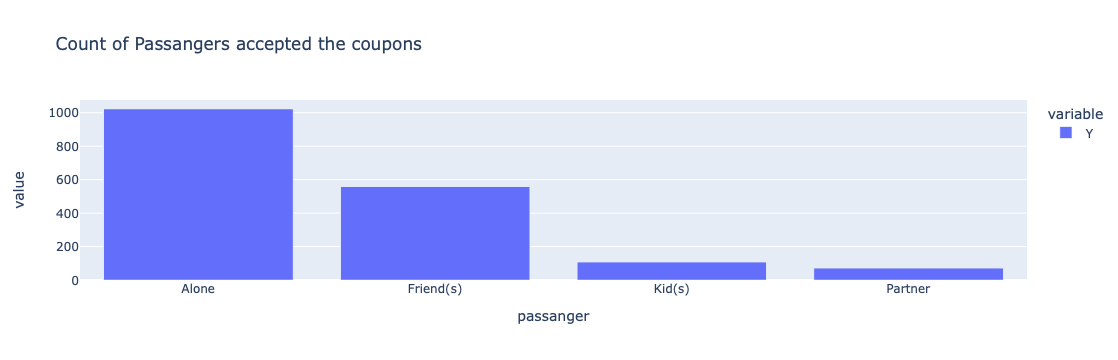

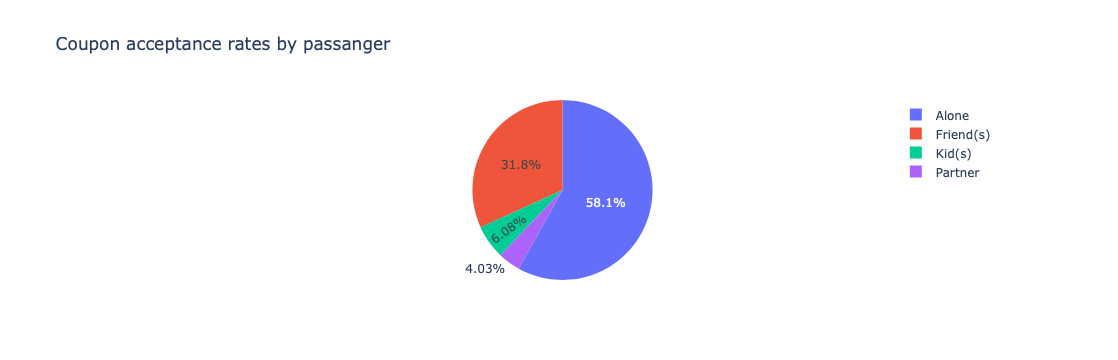

In [372]:
# Bar chart to visualize the count by passanger for Carry out & Take away coupons
fig_bar_carry_passanger = px.bar(data_carryaway.groupby("passanger")[["Y"]].sum()
                                ,title="Count of Passangers accepted the coupons")
# Pie chart to see the acceptance rate by passanger for Carryout & Take away coupons
fig_pie_carry_passanger = px.pie(data_carryaway, values="Y", names="passanger",title="Coupon acceptance rates by passanger")
fig_bar_carry_passanger.show()
fig_pie_carry_passanger.show()

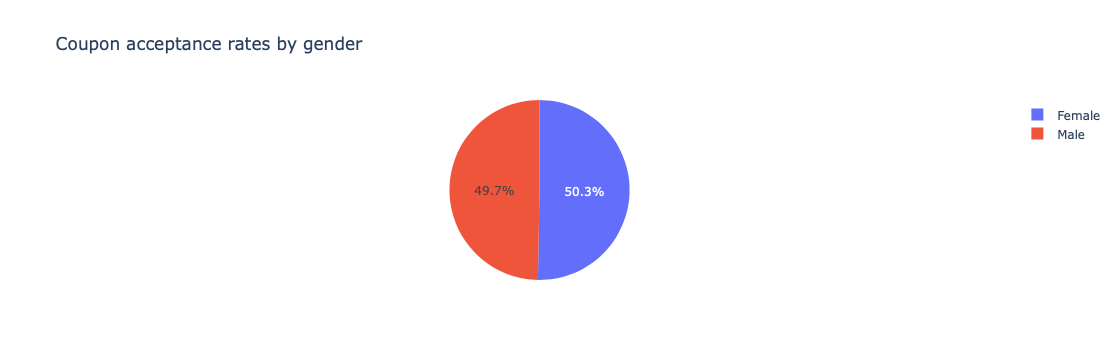

In [374]:
# Pie chart to see the acceptance rate by gender for Carryout & Take away coupons
fig_pie_carry_gender = px.pie(data_carryaway, values="Y", names="gender",title="Coupon acceptance rates by gender")
fig_pie_carry_gender.show()

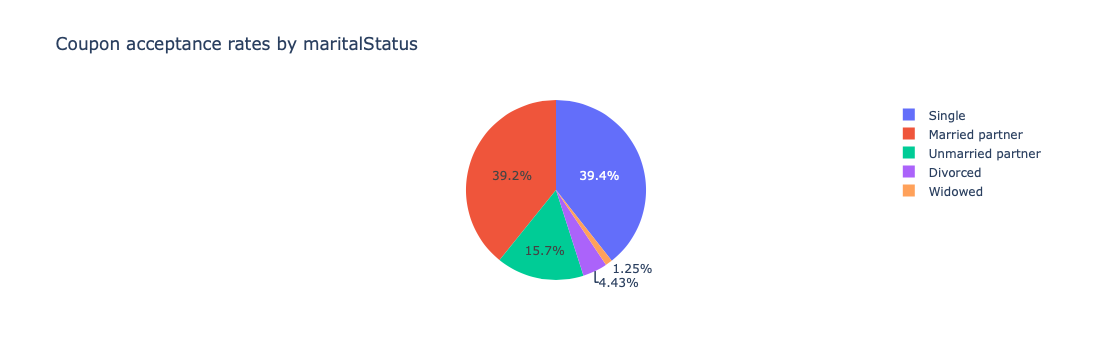

In [373]:
# Pie chart to see the acceptance rate by marital status for Carryout & Take away coupons
fig_pie_carry_marital = px.pie(data_carryaway, values="Y", names="maritalStatus",title="Coupon acceptance rates by maritalStatus")
fig_pie_carry_marital.show()

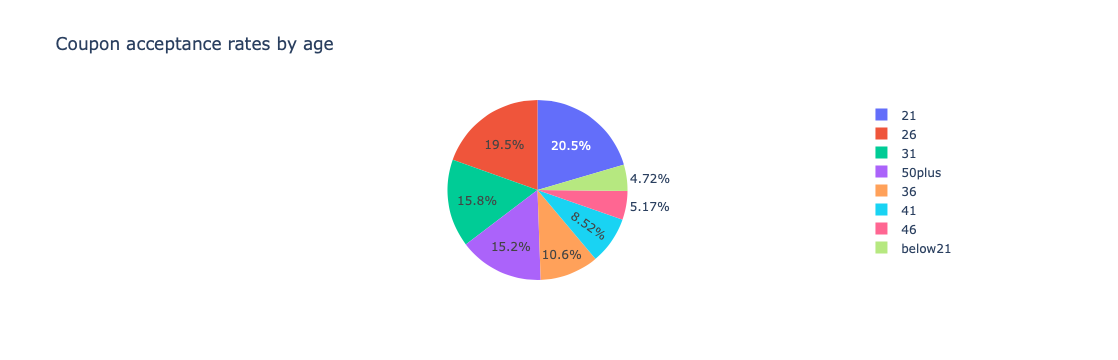

In [385]:
# Pie chart to see the acceptance rate by age for Carryout & Take away coupons
fig_pie_carry_age = px.pie(data_carryaway, values="Y", names="age",title="Coupon acceptance rates by age")
fig_pie_carry_age.show()

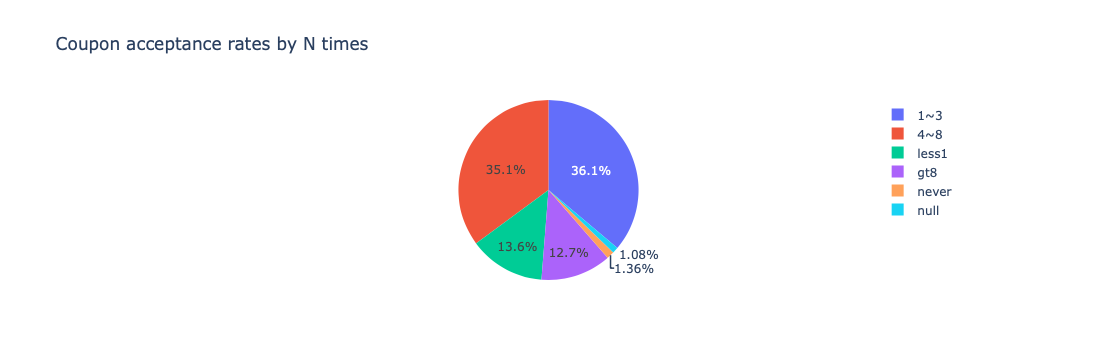

In [386]:
# Pie chart to see the acceptance rate by N times visit for Carryout & Take away coupons
fig_pie_carry_times = px.pie(data_carryaway, values="Y", names="CarryAway",title="Coupon acceptance rates by N times")
fig_pie_carry_times.show()

Number of coupons not accepted: 5474


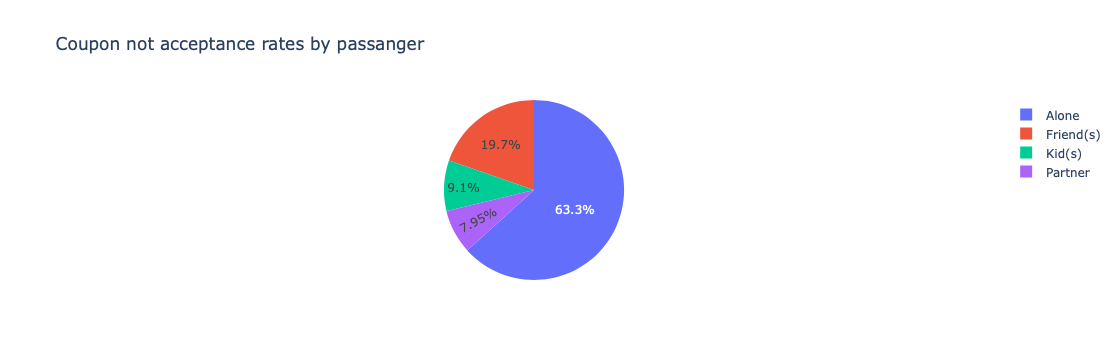

In [421]:
# Analyze the reasons why the coupons were not accepted by the drivers.

# Pie chart to see by passanger were the coupons not accepted
data_n = data.query('Y == 0')
print(f'Number of coupons not accepted: {len(data_n)}')
# Replacing the column value to 1 as this dataframe contains only Not accepted coupons data
data_n['Y'] = 1

fig_data_n_pass = px.pie(data_n, values="Y", names="passanger",title="Coupon not acceptance rates by passanger")
fig_data_n_pass.show()




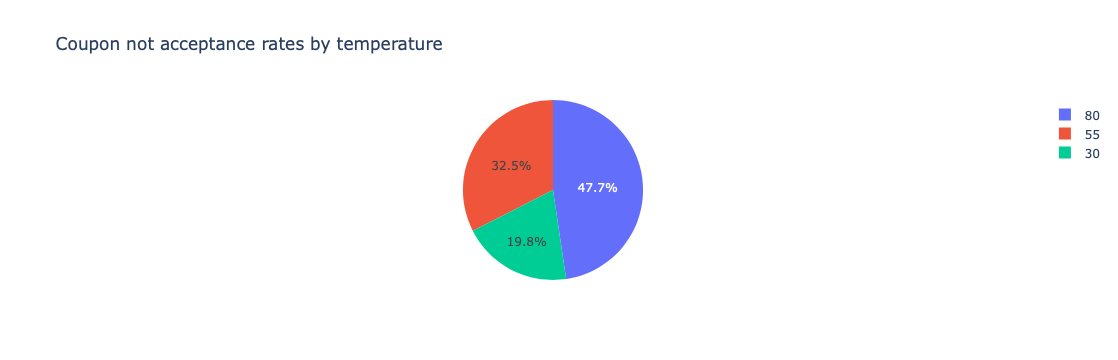

In [416]:
# Pie chart to see by temperature were the coupons not accepted
fig_data_n_temp = px.pie(data_n, values="Y", names="temperature",title="Coupon not acceptance rates by temperature")
fig_data_n_temp.show()

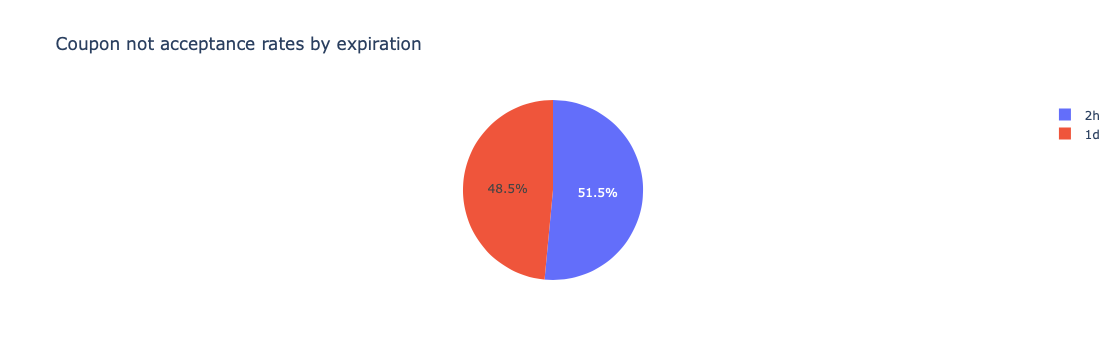

In [417]:
# Pie chart to see by expiration were the coupons not accepted
fig_data_n_exp = px.pie(data_n, values="Y", names="expiration",title="Coupon not acceptance rates by expiration")
fig_data_n_exp.show()

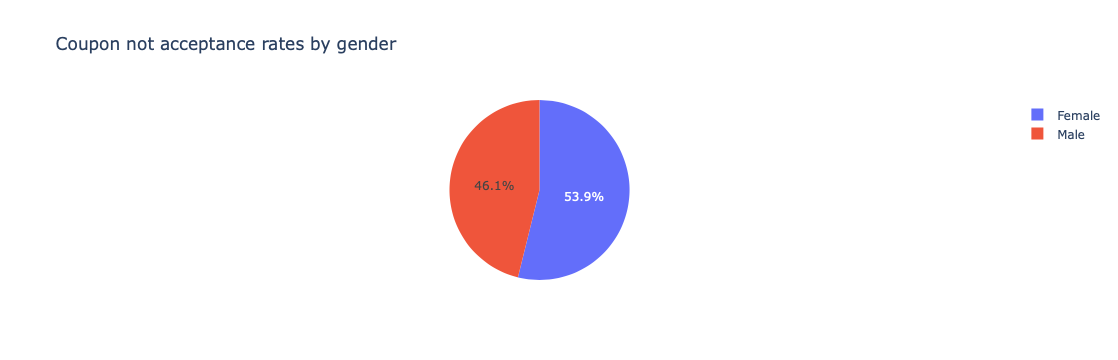

In [420]:
# Pie chart to see by gender were the coupons not accepted
fig_data_n_gen = px.pie(data_n, values="Y", names="gender",title="Coupon not acceptance rates by gender")
fig_data_n_gen.show()

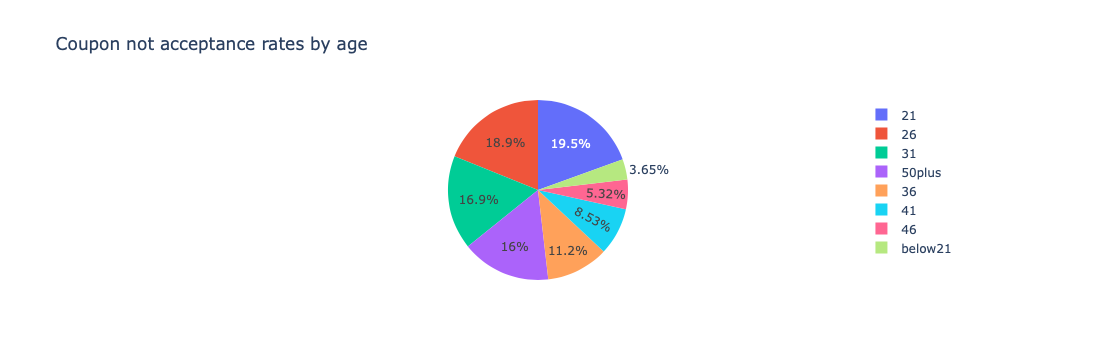

In [422]:
# Pie chart to see by age were the coupons not accepted
fig_data_n_age = px.pie(data_n, values="Y", names="age",title="Coupon not acceptance rates by age")
fig_data_n_age.show()

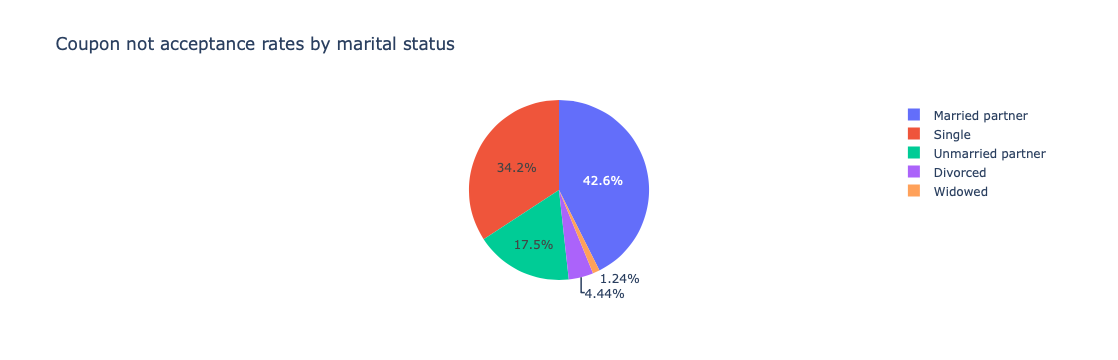

In [419]:
# Pie chart to see by marital status were the coupons not accepted
fig_data_n_mar = px.pie(data_n, values="Y", names="maritalStatus",title="Coupon not acceptance rates by marital status")
fig_data_n_mar.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



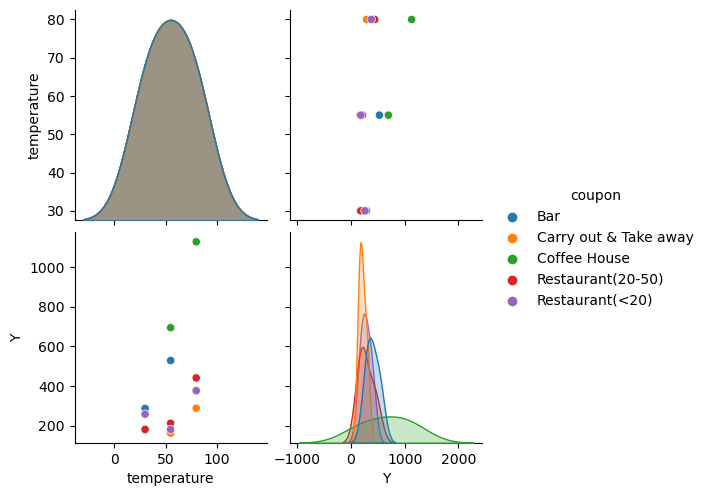

In [532]:
#Seaborn plot on temparature for coupons not accepted
data_n_coupon_temp = data_n.groupby(["coupon","temperature"])[["Y"]].count().reset_index()
sns.pairplot(data_n_coupon_temp, hue="coupon")


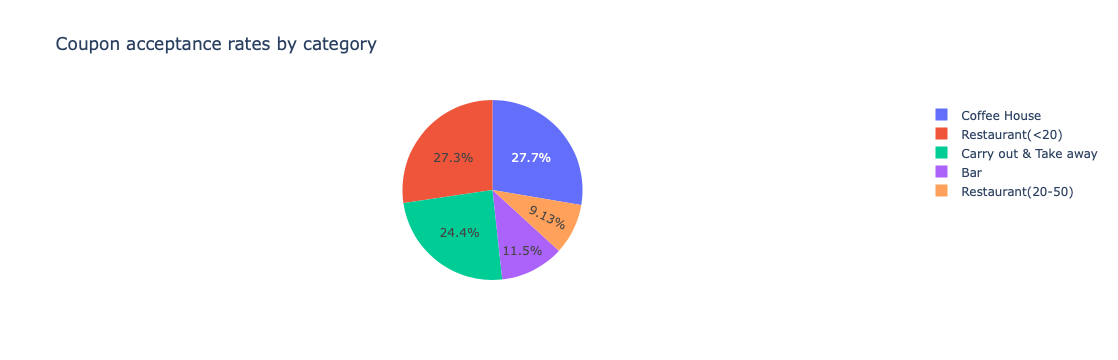

In [542]:
# Pie chart to visualize the coupon acceptance rate by category on the entire dataset
fig_pie_data = px.pie(data, values="Y", names="coupon",title="Coupon acceptance rates by category")
fig_pie_data.show()